# 500-Person-Gender-Height-Weight-Body-Mass-Index

This is a fairly straightforward problem and is ideal for people starting off with data science. It is a regression problem. The dataset has 500 rows and 4 columns (Gender, index, height and weight).

Gender : Male / Female
  
  Height : Number (cm)

  Weight : Number (Kg)
  
  Index :  
        
        0 - Extremely Weak 
        
        1 - Weak
        
        2 - Normal  
        
        3 - Overweight  
        
        4 - Obesity  
        
        5 - Extreme Obesity

In [4]:
#importing data Analysis library
import numpy as np
import pandas as pd

In [5]:
#importing data visualization library
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline
sns.set_style('whitegrid')

In [9]:
#read the data
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [10]:
#check the head
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.7+ KB


In [12]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


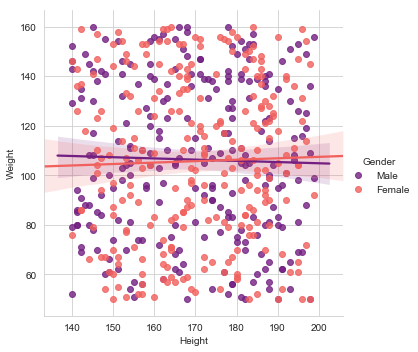

In [204]:
sns.lmplot(x='Height', y='Weight', data=df, hue='Gender', palette='magma', markers='o', sharex=True)

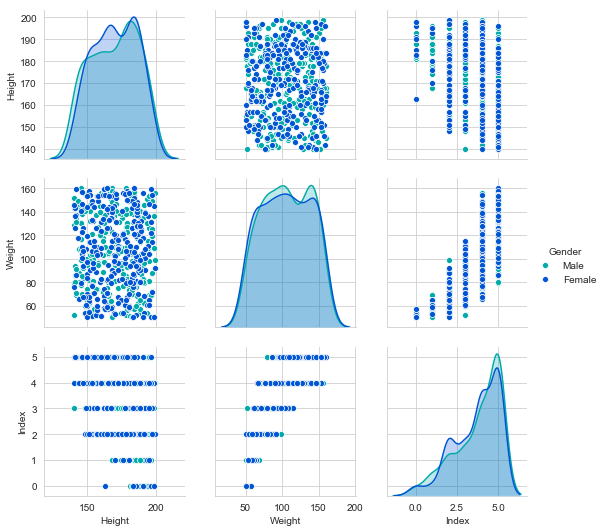

In [55]:
sns.pairplot(df, hue='Gender', palette='winter_r')

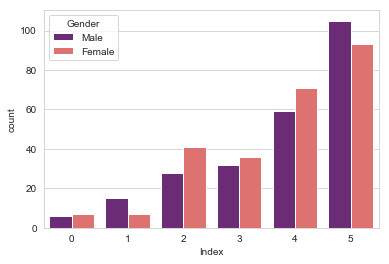

In [66]:
sns.countplot(x='Index', hue='Gender', data=df, palette='magma')

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


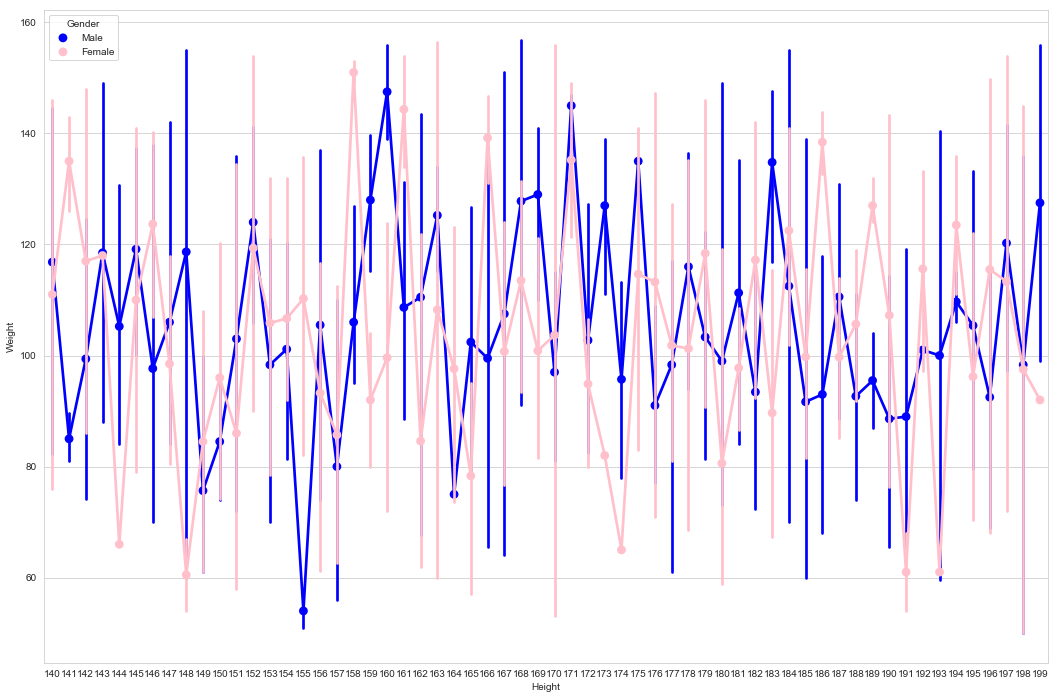

In [75]:
plt.figure(figsize=(18,12))
sns.pointplot(x='Height', y='Weight', data=df, hue='Gender', palette={'Male':'blue','Female':'pink'})

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


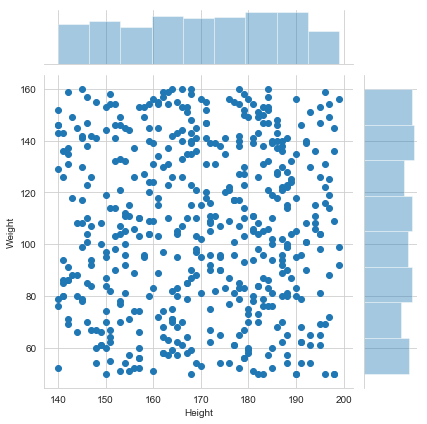

In [84]:
sns.jointplot(x='Height', y='Weight', data=df)

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


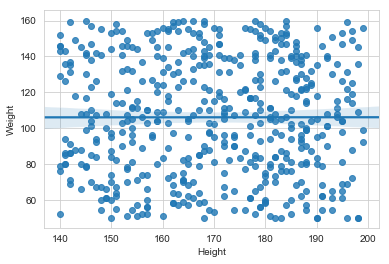

In [89]:
sns.regplot(x='Height', y='Weight', data=df)

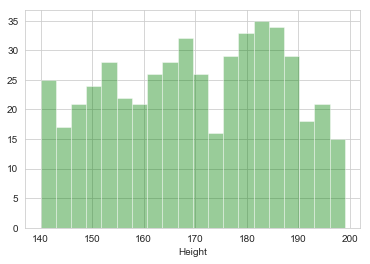

In [105]:
sns.distplot(df['Height'].dropna(), kde=False, bins=20, color='Green')

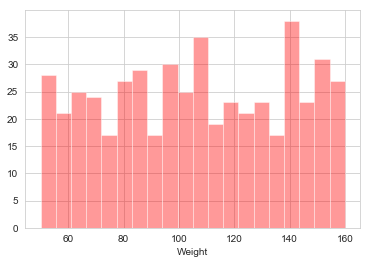

In [133]:
sns.distplot(df['Weight'].dropna(), kde=False, bins=20, color='red')

In [134]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


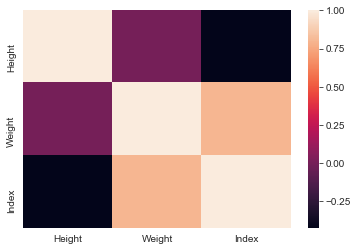

In [132]:
sns.heatmap(df.corr())

# Train-Test_split

In [114]:
from sklearn.cross_validation import train_test_split

In [116]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [231]:
#depending on X features we are predicting y 
X = df[['Index', 'Weight']]
y = df['Height']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [233]:
#X_train[:5]

In [234]:
#X_test[:5]

## Linear Regression

In [235]:
from sklearn.linear_model import LinearRegression

In [236]:
lm = LinearRegression()

In [237]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [238]:
print(lm.intercept_)

173.3588641276522


In [247]:
print(lm.coef_)

[-14.10793176   0.46379118]


## Predictions

In [240]:
preds = lm.predict(X_test)

In [256]:
preds

array([173.50966107, 169.26014197, 156.3493874 , 153.10284913,
       152.4448616 , 179.26935158, 174.70683825, 174.82563614,
       176.09821179, 165.625211  , 153.83623514, 164.69762864,
       161.91488156, 159.86552048, 174.24304707, 179.92733912,
       167.74997055, 163.50045146, 170.53271763, 159.86552048,
       163.57584993, 148.92872851, 169.5297368 , 173.31546471,
       161.45109038, 176.09821179, 196.54842314, 177.87797804,
       164.50343229, 157.0827734 , 172.04288906, 172.50668024,
       183.63766856, 139.92249973, 179.26935158, 175.17062943,
       166.08900218, 196.54842314, 174.24304707, 158.01035576,
       142.70524681, 184.2956561 , 158.6683433 , 189.39735908,
       164.03964111, 180.93031995, 158.20455212, 197.01221432,
       139.92249973, 175.63442061, 164.23383746, 151.05348806,
       154.30002632, 176.56200297, 161.25689402, 187.07840318,
       160.71770437, 173.77925589, 170.99650881, 169.14134409,
       152.90865278, 167.01658454, 156.3493874 , 166.35

In [257]:
y_test

207    196
288    156
327    167
234    145
479    147
3      195
134    171
417    162
362    151
53     172
16     157
155    179
182    162
84     168
107    159
73     180
323    187
250    153
443    152
143    163
261    163
96     142
274    178
364    184
114    177
65     179
99     190
162    192
409    166
87     145
      ... 
318    170
263    157
219    159
335    155
216    143
404    193
478    151
393    183
213    196
315    154
83     186
268    168
459    184
477    167
200    184
90     178
451    172
488    198
420    195
387    160
123    184
312    191
371    160
151    140
366    185
76     165
110    150
89     185
82     190
352    160
Name: Height, Length: 200, dtype: int64

In [246]:
dfs = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [244]:
dfs

,Coeff
Index,-14.107932
Weight,0.463791


Text(0,0.5,'Predictions')

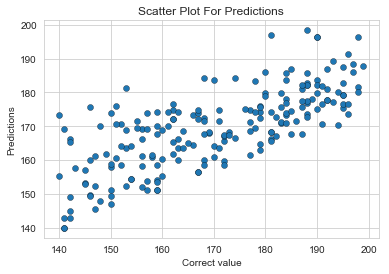

In [269]:
#one way to check our dataset with our predicted data is to plot a scatter plot
plt.scatter(y_test, preds, linewidths=0.3, edgecolors='black')
plt.title('Scatter Plot For Predictions')
plt.xlabel('Correct value')
plt.ylabel('Predictions')

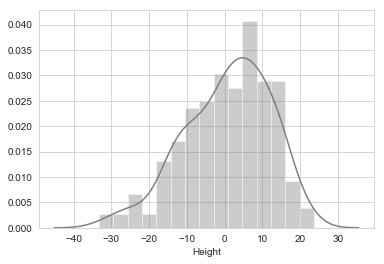

In [273]:
# difference of our residual values from
# our correct dataset and predicted values
sns.distplot((y_test-preds), color='grey', kde=True, bins=15)